# Simple Linear Regression

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import pandas_datareader

C:\Program Files\Anaconda3\lib\site-packages\pandas\compat\_optional.py:106: UserWarning: Pandas requires version '1.2.1' or newer of 'bottleneck' (version '1.1.0' currently installed).
  warnings.warn(msg, UserWarning)
C:\Program Files\Anaconda3\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


## Importing the dataset

In [2]:
start_date = '2017-06-12'
end_date = '2020-06-12'

In [3]:
data = pandas_datareader.data.get_data_yahoo('^NSEI', start_date, end_date)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-06-12,9647.049805,9598.500000,9646.700195,9616.400391,141400.0,9616.400391
2017-06-13,9654.150391,9595.400391,9615.549805,9606.900391,129700.0,9606.900391
2017-06-14,9627.400391,9580.450195,9621.549805,9618.150391,181800.0,9618.150391
2017-06-15,9621.400391,9560.799805,9617.900391,9578.049805,171100.0,9578.049805
2017-06-16,9615.849609,9565.500000,9595.450195,9588.049805,213200.0,9588.049805


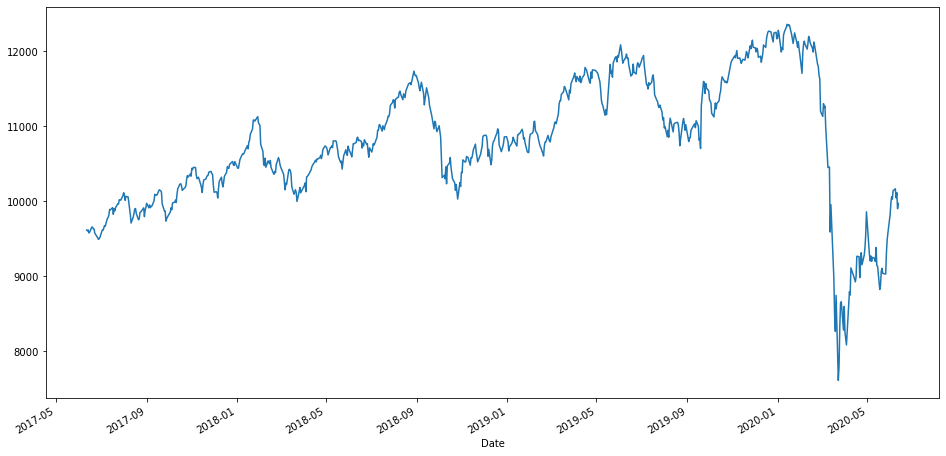

In [4]:
plt.figure(figsize=(16,8))
data['Close'].plot()
plt.show()

In [5]:
X=data[0:len(data)-1][['Adj Close']]
y=data[1:len(data)][['Adj Close']].rename(columns={'Adj Close': 'Close'})

## Splitting the dataset into the Training set and Test set

In [6]:
d = 11
X_train = X.head(X.shape[0]-d)
y_train = y.head(X.shape[0]-d)
X_test = X.tail(d) 
y_test = y.tail(d)

## Training the Simple Linear Regression model on the Training set

In [7]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Predicting the Test set results

In [8]:
y_pred = regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.values.reshape(len(y_test),1)),1))

[[ 9504.12  9580.3 ]
 [ 9593.34  9826.15]
 [ 9836.53  9979.1 ]
 [ 9987.82 10061.55]
 [10069.38 10029.1 ]
 [10037.28 10142.15]
 [10149.11 10167.45]
 [10174.13 10046.65]
 [10054.64 10116.15]
 [10123.39  9902.  ]
 [ 9911.56  9972.9 ]]


## Visualising the Training set results

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


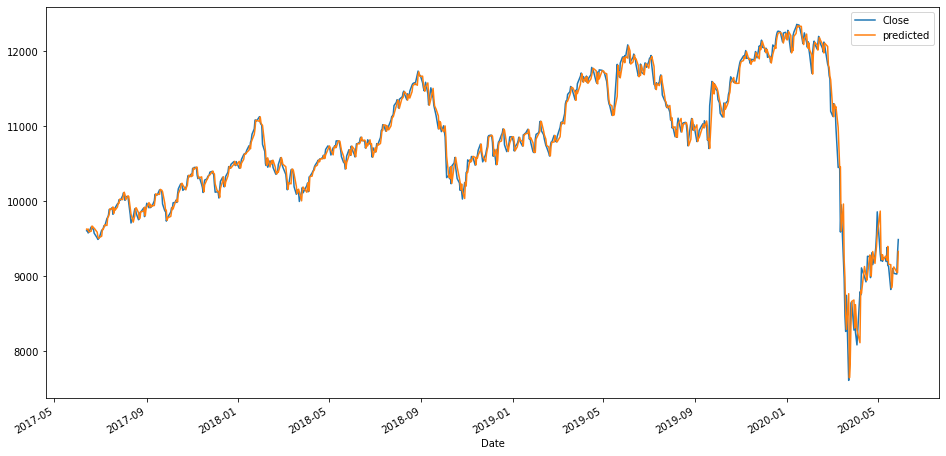

In [9]:
y_plt = y_train[:]
y_plt['predicted'] = np.array(regressor.predict(X_train))
plt.figure(figsize=(16,8))
y_train['Close'].plot()
y_plt['predicted'].plot()
plt.legend()

## Visualising the Test set results

C:\Program Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


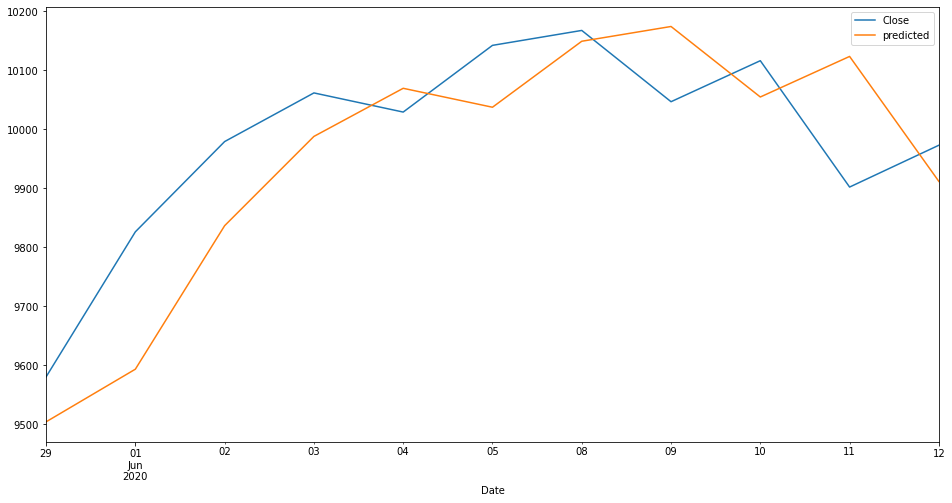

In [10]:
y_plt2 = y_test[:]
y_plt2['predicted'] = np.array(regressor.predict(X_test))
plt.figure(figsize=(16,8))
y_test['Close'].plot()
y_plt2['predicted'].plot()
plt.legend()

## Visualising the Future set results

In [11]:
n=1
y_future = y_test[:].rename(columns={'Close': 'Future'})
for i in range(n+1,d):
    y_future['Future'][i] = regressor.predict([y_future.iloc[i-n-1:i-1,0]])

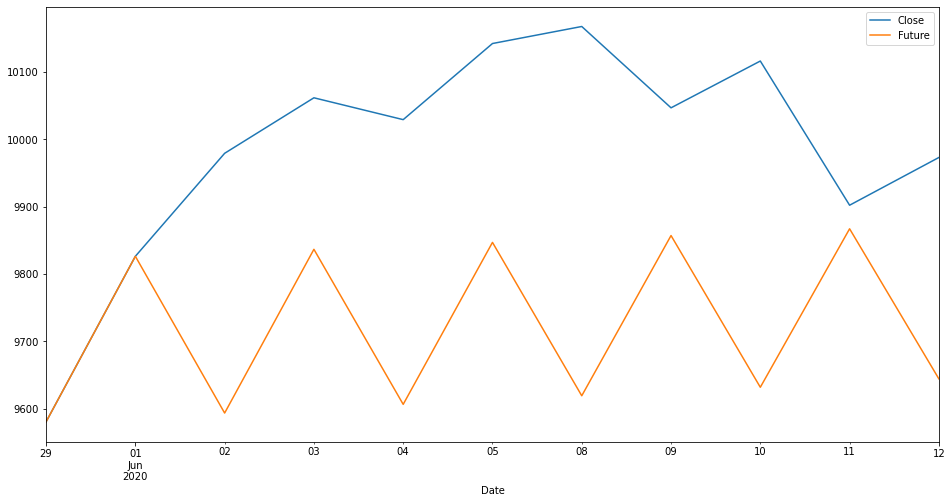

In [12]:
plt.figure(figsize=(16,8))
y_test['Close'].plot()
y_future['Future'].plot()
plt.legend()

In [13]:
from sklearn.metrics import r2_score
r2_score(y_test.tail(d-n).values, y_future.tail(d-n).values)

-10.061408529936955